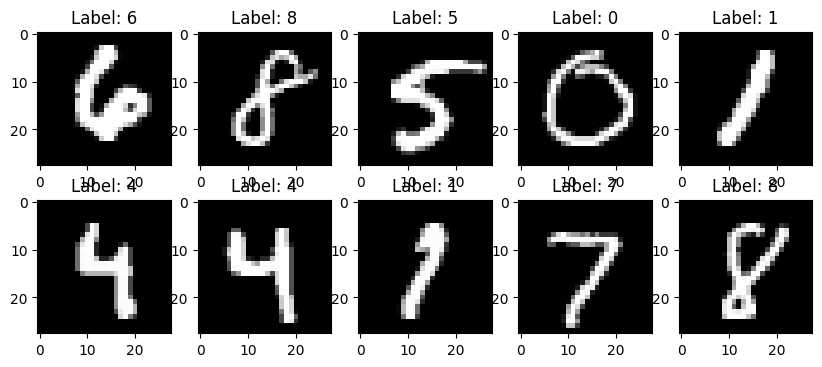

Results for PCA (all components) using scikit-learn SVM:
Accuracy: 0.9068
Precision: 0.907260373848209
Recall: 0.9068
F1 Score: 0.9065202280597505
Confusion Matrix:
[[ 939    0   10    2    5    6   10    5    2    1]
 [   0 1106    6    3    1    1    4    2   11    1]
 [  16   11  947   14    8    3    8    8   15    2]
 [   6    7   20  909    3   29    2   14   15    5]
 [   3    3   11    3  910    0    8    6    4   34]
 [  13    5    9   47   11  758    9    4   27    9]
 [   8    5   15    6   10   25  884    0    5    0]
 [   5   11   24   11   20    4    1  937    1   14]
 [   6    6   18   30   13   29    9   11  844    8]
 [   8    5    7   19   77    4    0   39   16  834]]
Results for Singer Crammer SVM:
Accuracy: 0.8573
Precision: 0.8574845886029833
Recall: 0.8573
F1 Score: 0.8563340935726467
Confusion Matrix:
[[ 953    0    4    1    0   10    6    4    1    1]
 [   0 1111    4    2    3    2    4    0    9    0]
 [  11   25  847   62   11   12   18    6   37    3]
 [  

In [ ]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Singer Crammer SVM Implementation
def singer_crammer_svm(X_train, y_train, C, max_iters):
    num_samples, num_features = X_train.shape
    num_classes = np.max(y_train) + 1

    # Initialize model parameters
    W = np.zeros((num_classes, num_features))
    b = np.zeros(num_classes)

    for _ in range(max_iters):
        for i in range(num_samples):
            xi = X_train[i]
            yi = y_train[i]
            scores = np.dot(W, xi) + b
            correct_class_score = scores[yi]
            margin = 1.0

            for j in range(num_classes):
                if j == yi:
                    continue
                loss = np.maximum(0, scores[j] - correct_class_score + margin)
                dW = np.zeros_like(W)
                db = np.zeros(num_classes)

                if loss > 0:
                    dW[j] += xi
                    dW[yi] -= xi
                    db[j] += 1
                    db[yi] -= 1

                dW /= num_samples
                db /= num_samples

                W -= C * dW
                b -= C * db

    return W, b

def predict_singer_crammer_svm(W, b, X):
    scores = np.dot(X, W.T) + b
    y_pred = np.argmax(scores, axis=1)
    return y_pred

# Load your dataset
def load_data():
    # Load the MNIST dataset from binary files
    with open('/content/train-images.idx3-ubyte', 'rb') as f:
        # Read image metadata
        magic, num_images, num_rows, num_cols = struct.unpack('>IIII', f.read(16))
        # Read and reshape the training images
        X_train = np.fromfile(f, dtype=np.uint8).reshape(num_images, num_rows * num_cols)

    with open('/content/train-labels.idx1-ubyte', 'rb') as f:
        # Read label metadata
        magic, num_labels = struct.unpack('>II', f.read(8))
        # Read training labels
        y_train = np.fromfile(f, dtype=np.uint8)

    with open('/content/t10k-images.idx3-ubyte', 'rb') as f:
        # Read image metadata for the test set
        magic, num_images, num_rows, num_cols = struct.unpack('>IIII', f.read(16))
        # Read and reshape the test images
        X_test = np.fromfile(f, dtype=np.uint8).reshape(num_images, num_rows * num_cols)

    with open('/content/t10k-labels.idx1-ubyte', 'rb') as f:
        # Read label metadata for the test set
        magic, num_labels = struct.unpack('>II', f.read(8))
        # Read test labels
        y_test = np.fromfile(f, dtype=np.uint8)

    return X_train, y_train, X_test, y_test

# Load the MNIST dataset
X_train, y_train, X_test, y_test = load_data()

# Display 10 random training images along with their labels
plt.figure(figsize=(10, 4))
for i in range(10):
    index = np.random.randint(0, X_train.shape[0])
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[index].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[index]}")
plt.show()

# Implement PCA for dimensionality reduction with all available components
pca_all = PCA(n_components=None)  # None means keep all components
X_train_pca_all = pca_all.fit_transform(X_train)
X_test_pca_all = pca_all.transform(X_test)

# Train an SVM model using scikit-learn with PCA (all components)
svm = make_pipeline(StandardScaler(), SVC(C=0.11, kernel='linear'))
svm.fit(X_train_pca_all, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test_pca_all)

# Calculate evaluation metrics for the SVM model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Print the results for PCA (all components) using scikit-learn SVM
print("Results for PCA (all components) using scikit-learn SVM:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

# Implement Singer Crammer SVM and evaluate the results
C = 1.0  # You can adjust C and max_iters
max_iters = 100
model_parameters = singer_crammer_svm(X_train_pca_all, y_train, C, max_iters)
W, b = model_parameters

# Make predictions using Singer Crammer SVM
y_pred_singer_crammer = predict_singer_crammer_svm(W, b, X_test_pca_all)

# Calculate evaluation metrics for Singer Crammer SVM
accuracy_singer_crammer = accuracy_score(y_test, y_pred_singer_crammer)
precision_singer_crammer = precision_score(y_test, y_pred_singer_crammer, average='weighted')
recall_singer_crammer = recall_score(y_test, y_pred_singer_crammer, average='weighted')
f1_singer_crammer = f1_score(y_test, y_pred_singer_crammer, average='weighted')
cm_singer_crammer = confusion_matrix(y_test, y_pred_singer_crammer)

# Print the results for Singer Crammer SVM
print("Results for Singer Crammer SVM:")
print(f"Accuracy: {accuracy_singer_crammer}")
print(f"Precision: {precision_singer_crammer}")
print(f"Recall: {recall_singer_crammer}")
print(f"F1 Score: {f1_singer_crammer}")
print("Confusion Matrix:")
print(cm_singer_crammer)


In [ ]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Singer Crammer SVM Implementation
def singer_crammer_svm(X_train, y_train, C, max_iters):
    # Your singer_crammer_svm function code here

# Load your dataset
def load_data():
    # Your load_data function code here

# Load the MNIST dataset
X_train, y_train, X_test, y_test = load_data()

# Implement PCA for dimensionality reduction with all available components
pca_all = PCA(n_components=None)  # None means keep all components
X_train_pca_all = pca_all.fit_transform(X_train)
X_test_pca_all = pca_all.transform(X_test)

# Split the dataset into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_pca_all, y_train, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],  # Adjust the range as needed
    'max_iters': [50, 100, 200],  # Adjust the range as needed
}

# Create the Singer Crammer SVM model
svm = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_split, y_train_split)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Singer Crammer SVM model with the best hyperparameters
best_svm = make_pipeline(StandardScaler(), SVC(C=best_params['C'], kernel='linear'))
best_svm.fit(X_train_pca_all, y_train)

# Make predictions on the test data
y_pred_singer_crammer = best_svm.predict(X_test_pca_all)

# Calculate evaluation metrics for Singer Crammer SVM with the best hyperparameters
accuracy_singer_crammer = accuracy_score(y_test, y_pred_singer_crammer)
precision_singer_crammer = precision_score(y_test, y_pred_singer_crammer, average='weighted')
recall_singer_crammer = recall_score(y_test, y_pred_singer_crammer, average='weighted')
f1_singer_crammer = f1_score(y_test, y_pred_singer_crammer, average='weighted')
cm_singer_crammer = confusion_matrix(y_test, y_pred_singer_crammer)

# Print the results for Singer Crammer SVM with the best hyperparameters
print("Best Hyperparameters:", best_params)
print("Results for Singer Crammer SVM with Best Hyperparameters:")
print(f"Accuracy: {accuracy_singer_crammer}")
print(f"Precision: {precision_singer_crammer}")
print(f"Recall: {recall_singer_crammer}")
print(f"F1 Score: {f1_singer_crammer}")
print("Confusion Matrix:")
print(cm_singer_crammer)


IndentationError: ignored